<a href="https://colab.research.google.com/github/suryagokul/Data-Science-Portfolio/blob/master/Feature_Engineering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handling**  **Continous Values**

# Techniques:
              

1.   Mean/Median  Imputation
              
2.   Random Sampling Imputation

3.   Capture Nan Using New Feature Imputation

4.   End of Distribution Imputation

5.   Arbitary Imputation 





In [18]:
from  seaborn import load_dataset

import seaborn as sns

In [20]:
seaborn.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [177]:
df = load_dataset('titanic')

In [178]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [179]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# MEAN/MEDIAN IMPUTATION

In [180]:
boolean = (df.dtypes=='int64') |  (df.dtypes=='float64')

numericals = [a[i] for i in range(len(boolean[boolean==True].index))]

numericals

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [181]:
def fill_nan(data,feature):
  if data[feature].isnull().sum()>0:
    data[feature] = data[feature].fillna(data[feature].mean())

for i in range(len(numericals)):
  fill_nan(df,numericals[i])

In [184]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Random Sampling

Whenever there is a relation between Nan values and output feature we use this imputation

In [428]:
RS_df = load_dataset('titanic')

In [429]:
RS_df['deck_new'] = np.where(RS_df['deck'].isna(),1,0)

87% of people who are not survived are given as Nan value as shown below.
So,there is a relation

In [430]:
RS_df.groupby(['survived'])['deck_new'].mean()

survived
0    0.877960
1    0.602339
Name: deck_new, dtype: float64

For now we are using Numerical Feature "age" for random imputation

In [431]:
RS_df['age'].loc[RS_df['age'].isnull()]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: age, Length: 177, dtype: float64

In [432]:
 RS_df['age'].loc[5]

nan

In [433]:
new = RS_df['age'].dropna().sample(RS_df['age'].isnull().sum(),replace=True,random_state=0)

In [434]:
new

856    45.0
704    26.0
789    46.0
238    19.0
883    28.0
       ... 
664    20.0
871    47.0
191    19.0
744    31.0
56     21.0
Name: age, Length: 177, dtype: float64

In [435]:
new.index =  RS_df[RS_df['age'].isnull()].index

RS_df['age_sample'] = RS_df['age']

In [436]:
RS_df.loc[RS_df['age'].isnull(),'age_sample'] = new

In [437]:
RS_df['age_sample'].loc[5]

45.0

In [438]:
RS_df['age_sample'].isnull().sum()

0

In [439]:
RS_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,deck_new,age_sample
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,1,21.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0,26.0


In [440]:
import matplotlib.pyplot as plt

In [446]:
RS_df['age_median'] = RS_df['age'].fillna(RS_df['age'].median())

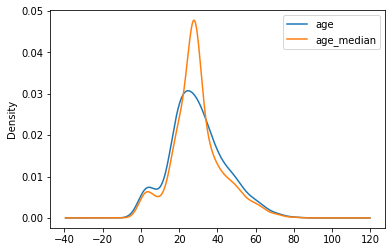

In [447]:
fig = plt.figure()

ax = fig.add_subplot(111)

RS_df.age.plot(kind='kde',ax=ax)

RS_df['age_median'].plot(kind='kde',ax=ax)

ax.legend()

Lot of disortion or variance incase of filling nan values with median as shown above

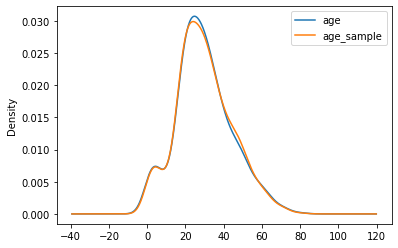

In [441]:
fig = plt.figure()

ax = fig.add_subplot(111)

RS_df.age.plot(kind='kde',ax=ax)

RS_df['age_sample'].plot(kind='kde',ax=ax)

ax.legend()

There is similar distribution incase of filling nan values with random samples as shown as above

# Capture nan values with new feature

In [449]:
df3 = load_dataset('titanic')

df3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [450]:
df3['new_feature'] = np.where(df3['age'].isnull(),1,0)

In [453]:
df3['new_feature'].head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: new_feature, dtype: int64

As we seen above we are filling nan values with 1.If there is 1 our model knows it has some pattern or it gives importance to that

In [455]:
df3.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_feature
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,1
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,0
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,0


# End Of Distribution

In [474]:
df4 = load_dataset('titanic')

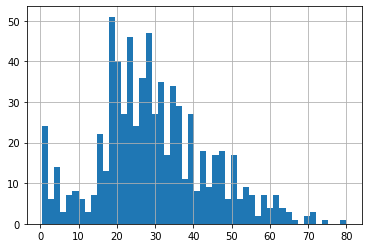

In [475]:
df4['age'].hist(bins=50)

In [476]:
EOD = (df4['age'].mean())+3*df4['age'].std()

EOD

73.27860964406095

In [477]:
3*df4['age'].std()

43.57949199700213

In [478]:
df4['age'].mean()

29.69911764705882

In [479]:
43.57949199700213 + 29.69911764705882

73.27860964406095

In [480]:
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


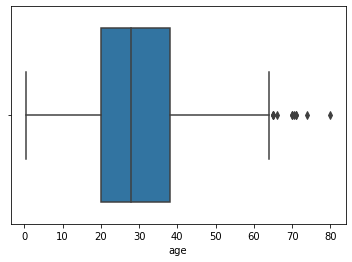

In [481]:
sns.boxplot('age',data=df4)

***There are some outliers as shown in figure***

In [482]:
df4['age_extreme'] = df4['age'].fillna(EOD)
  

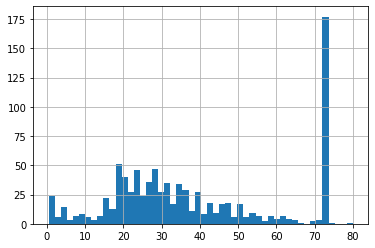

In [483]:
df4['age_extreme'].hist(bins=50)

***As shown in figure after filling nan values with end of distributed value and then distribution is right skewed***

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


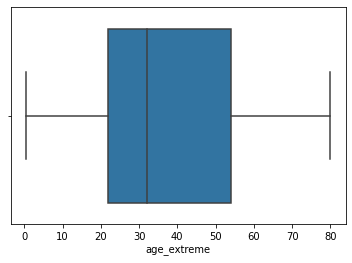

In [484]:
sns.boxplot('age_extreme',data=df4)

**After applying EOD the feature age_extreme does not have any Outliers as shown above**

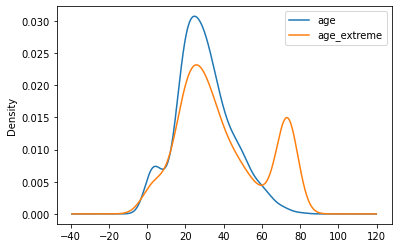

In [487]:
fig = plt.figure()

ax = fig.add_subplot(111)

df4.age.plot(kind='kde',ax=ax)

df4['age_extreme'].plot(kind='kde',ax=ax)

ax.legend()

# Arbitary Value Imputation

In [488]:
df5 = load_dataset('titanic')

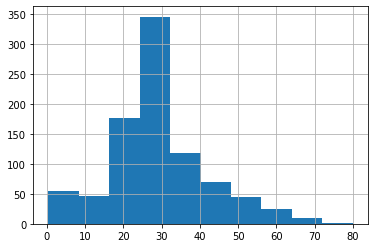

In [489]:
df['age'].hist()

In [493]:
df5['age_zeroes'] = df5['age'].fillna(0)

df5['age_last_outlier'] = df5['age'].fillna(80)

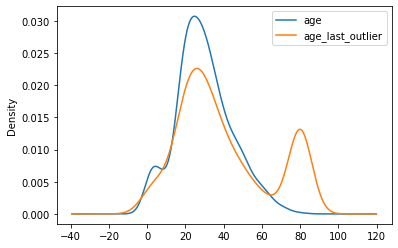

In [494]:
fig = plt.figure()

ax = fig.add_subplot(111)

df5.age.plot(kind='kde',ax=ax)

df5['age_last_outlier'].plot(kind='kde',ax=ax)

ax.legend()